<a href="https://colab.research.google.com/github/phong516/AI_Course/blob/main/homeworkFuzzy/evaluationRenalFuction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b025a12ed7769ca45e2c17dc63b092944953545b2a5aa9a03399b233c23388e7
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


320.9166666666655


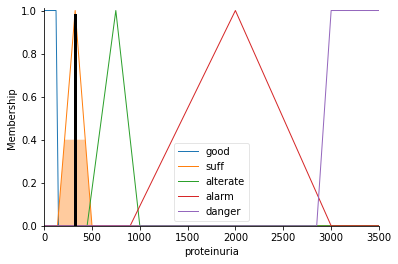

In [35]:
#ProtFIS

from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl


glycaemia   = ctrl.Antecedent(np.arange(60,141,1),'glycaemia')
glycaemia['good'] = fuzz.trapmf(glycaemia.universe,[60,70,80,99])
glycaemia['alarm'] = fuzz.trimf(glycaemia.universe,[95,112.5,125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[120,135,140,140])

sirolimus   = ctrl.Antecedent(np.arange(0,21,1),'sirolimus')
sirolimus['alarm down'] = fuzz.trapmf(sirolimus.universe,[0, 0, 3, 5])
sirolimus['suff'] = fuzz.trimf(sirolimus.universe,[4, 5, 7])
sirolimus['good'] = fuzz.trimf(sirolimus.universe,[6, 9, 12])
sirolimus['alarm up'] = fuzz.trimf(sirolimus.universe,[11, 12.5 ,14])
sirolimus['danger'] = fuzz.trapmf(sirolimus.universe,[13, 16.5, 20, 20])

proteinuria = ctrl.Consequent(np.arange(0,3501,1),'proteinuria')
proteinuria['good'] = fuzz.trapmf(proteinuria.universe,[0, 0, 125, 150])
proteinuria['suff'] = fuzz.trimf(proteinuria.universe,[140, 325, 500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe,[450, 750, 1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe,[900, 2000, 3000])
proteinuria['danger'] = fuzz.trapmf(proteinuria.universe,[2850, 3000, 3500, 3500])

"""glycaemia.view()
sirolimus.view()
proteinuria.view()"""

rule1 = ctrl.Rule(glycaemia['good'] & sirolimus['good'], proteinuria['good'])
rule2 = ctrl.Rule(glycaemia['danger'] & sirolimus['danger'], proteinuria['danger'])
rule3 = ctrl.Rule(glycaemia['good'] & sirolimus['suff'], proteinuria['suff'])
rule4 = ctrl.Rule(glycaemia['alarm'] & sirolimus['alarm up'], proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & sirolimus['suff'], proteinuria['alterate'])
rule6 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm up'], proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['alarm'] & sirolimus['good'], proteinuria['suff'])
rule8 = ctrl.Rule(glycaemia['good'] & sirolimus['alarm down'], proteinuria['suff'])

rule = []
for i in range (1, 9):
  rule.append(locals()["rule" + str(i)])

proteinuria_ctrl = ctrl.ControlSystem(rule)
proteinuriaSimu = ctrl.ControlSystemSimulation(proteinuria_ctrl)

proteinuriaSimu.input['glycaemia'] = 120
proteinuriaSimu.input['sirolimus'] = 10
proteinuriaSimu.compute()
print(proteinuriaSimu.output['proteinuria'])
proteinuria.view(sim = proteinuriaSimu)

7.2180575200377195


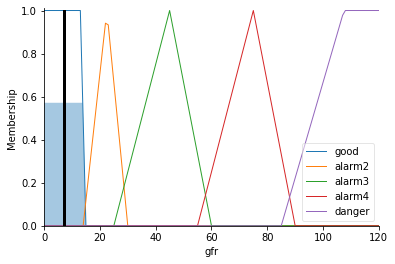

In [38]:
#GfrFIS
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl


glycaemia           = ctrl.Antecedent(np.arange(60,141,1),'glycaemia')
glycaemia['good']   = fuzz.trapmf(glycaemia.universe,[60,70,80,99])
glycaemia['alarm']  = fuzz.trimf(glycaemia.universe,[95,112.5,125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[120,135,140,140])

cyclosporine                = ctrl.Antecedent(np.arange(0,21,1),'cyclosporine')
cyclosporine['alarm down']  = fuzz.trimf(cyclosporine.universe,[0, 1, 2])
cyclosporine['suff']        = fuzz.trimf(cyclosporine.universe,[1.5, 3.25, 5])
cyclosporine['good']        = fuzz.trimf(cyclosporine.universe,[4, 7.5, 11])
cyclosporine['alarm up']    = fuzz.trimf(cyclosporine.universe,[8, 11.5 ,15])
cyclosporine['danger']      = fuzz.trapmf(cyclosporine.universe,[13, 16.5, 20, 20])

gfr           = ctrl.Consequent(np.arange(0,121,1),'gfr')
gfr['good'] = fuzz.trapmf(gfr.universe,[0, 0, 13, 15])
gfr['alarm2'] = fuzz.trimf(gfr.universe,[14, 22.5, 30])
gfr['alarm3'] = fuzz.trimf(gfr.universe,[25, 45, 60])
gfr['alarm4'] = fuzz.trimf(gfr.universe,[55, 75, 90])
gfr['danger']   = fuzz.trapmf(gfr.universe,[85, 107.5, 125, 125])

"""glycaemia.view()
cyclosporine.view()
gfr.view()"""

rule1 = ctrl.Rule(glycaemia['danger'] & cyclosporine['danger'] , gfr['danger'])
rule2 = ctrl.Rule(glycaemia['good'] & cyclosporine['danger'] , gfr['alarm3'])
rule3 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['alarm up'] , gfr['alarm4'])
rule4 = ctrl.Rule(glycaemia['good'] & cyclosporine['suff'] , gfr['alarm2'])
rule5 = ctrl.Rule(glycaemia['good'] & cyclosporine['good'] , gfr['good'])
rule6 = ctrl.Rule(glycaemia['alarm'] & cyclosporine['good'] , gfr['alarm2'])
rule7 = ctrl.Rule(glycaemia['danger'] & cyclosporine['good'] , gfr['alarm3'])

gfr_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
gfrSimu = ctrl.ControlSystemSimulation(gfr_ctrl)
gfrSimu.input['glycaemia'] = 87
gfrSimu.input['cyclosporine'] = 9
gfrSimu.compute()
print(gfrSimu.output['gfr'])
gfr.view(sim = gfrSimu)

321.1111111111108


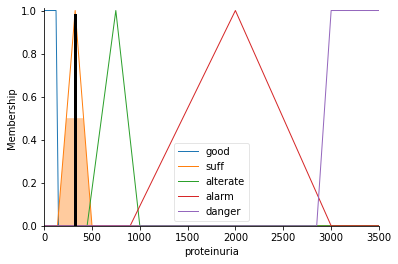

In [77]:
#ProtACE
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl

glycaemia           = ctrl.Antecedent(np.arange(60,141,1),'glycaemia')
glycaemia['good']   = fuzz.trapmf(glycaemia.universe,[60,70,80,99])
glycaemia['alarm']  = fuzz.trimf(glycaemia.universe,[95,112.5,125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[120,135,140,140])

diffACE     = ctrl.Antecedent(np.arange(0,7,1),'diffACE')
diffACE['0'] = fuzz.trimf(diffACE.universe,[0, 0, 1])
diffACE['1'] = fuzz.trimf(diffACE.universe,[0, 1, 2])
diffACE['2'] = fuzz.trimf(diffACE.universe,[1, 2, 3])
diffACE['3'] = fuzz.trimf(diffACE.universe,[3, 4, 5])
diffACE['4'] = fuzz.trapmf(diffACE.universe,[4, 5, 6, 6 ])

proteinuria = ctrl.Consequent(np.arange(0,3501,1),'proteinuria')
proteinuria['good'] = fuzz.trapmf(proteinuria.universe,[0, 0, 125, 150])
proteinuria['suff'] = fuzz.trimf(proteinuria.universe,[140, 325, 500])
proteinuria['alterate'] = fuzz.trimf(proteinuria.universe,[450, 750, 1000])
proteinuria['alarm'] = fuzz.trimf(proteinuria.universe,[900, 2000, 3000])
proteinuria['danger'] = fuzz.trapmf(proteinuria.universe,[2850, 3000, 3500, 3500])

"""glycaemia.view()
diffACE.view()
proteinuria.view()"""

rule1 = ctrl.Rule(diffACE['2'] , proteinuria['suff'])
rule2 = ctrl.Rule(glycaemia['good'] & diffACE['1'] , proteinuria['suff'])
rule3 = ctrl.Rule(glycaemia['alarm'] & diffACE['1'] , proteinuria['alterate'])
rule4 = ctrl.Rule(glycaemia['danger'] & diffACE['1'] , proteinuria['alarm'])
rule5 = ctrl.Rule(glycaemia['alarm'] & diffACE['3'] , proteinuria['alarm'])
rule6 = ctrl.Rule(glycaemia['good'] & diffACE['3'] , proteinuria['alterate'])
rule7 = ctrl.Rule(glycaemia['danger'] & diffACE['4'] , proteinuria['danger'])
rule8 = ctrl.Rule(glycaemia['good'] & diffACE['0'] , proteinuria['good'])

rule = []
for i in range(1, 9):
  rule.append(locals()["rule" + str(i)])

proteinuria_ctrl = ctrl.ControlSystem(rule)
proteinuriaSimu = ctrl.ControlSystemSimulation(proteinuria_ctrl)
proteinuriaSimu.input['glycaemia'] = 80
proteinuriaSimu.input['diffACE'] = 2.5
proteinuriaSimu.compute()
print(proteinuriaSimu.output['proteinuria'])
proteinuria.view(sim = proteinuriaSimu)

43.05555555555555


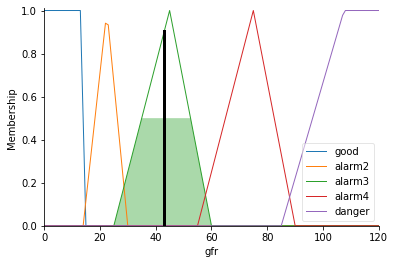

In [78]:
#GfrACE
from skfuzzy.control.controlsystem import Antecedent
import numpy as np
import  skfuzzy as fuzz
from skfuzzy import control as ctrl

glycaemia           = ctrl.Antecedent(np.arange(60,141,1),'glycaemia')
glycaemia['good']   = fuzz.trapmf(glycaemia.universe,[60,70,80,99])
glycaemia['alarm']  = fuzz.trimf(glycaemia.universe,[95,112.5,125])
glycaemia['danger'] = fuzz.trapmf(glycaemia.universe,[120,135,140,140])

diffACE     = ctrl.Antecedent(np.arange(0,7,1),'diffACE')
diffACE['0'] = fuzz.trimf(diffACE.universe,[0, 0, 1])
diffACE['1'] = fuzz.trimf(diffACE.universe,[0, 1, 2])
diffACE['2'] = fuzz.trimf(diffACE.universe,[1, 2, 3])
diffACE['3'] = fuzz.trimf(diffACE.universe,[3, 4, 5])
diffACE['4'] = fuzz.trapmf(diffACE.universe,[4, 5, 6, 6 ])

gfr           = ctrl.Consequent(np.arange(0,121,1),'gfr')
gfr['good'] = fuzz.trapmf(gfr.universe,[0, 0, 13, 15])
gfr['alarm2'] = fuzz.trimf(gfr.universe,[14, 22.5, 30])
gfr['alarm3'] = fuzz.trimf(gfr.universe,[25, 45, 60])
gfr['alarm4'] = fuzz.trimf(gfr.universe,[55, 75, 90])
gfr['danger']   = fuzz.trapmf(gfr.universe,[85, 107.5, 125, 125])

"""glycaemia.view()
diffACE.view()
proteinuria.view()"""

rule1 = ctrl.Rule(glycaemia['good'] & diffACE['2'] , gfr['alarm3'])
rule2 = ctrl.Rule(glycaemia['alarm'] & diffACE['2'] , gfr['alarm3'])
rule3 = ctrl.Rule(glycaemia['good'] & diffACE['1'] , gfr['alarm2'])
rule4 = ctrl.Rule(glycaemia['alarm'] & diffACE['1'] , gfr['alarm2'])
rule5 = ctrl.Rule(glycaemia['good'] & diffACE['3'] , gfr['alarm3'])
rule6 = ctrl.Rule(glycaemia['danger'] & diffACE['3'] , gfr['alarm4'])
rule7 = ctrl.Rule(glycaemia['good'] & diffACE['4'] , gfr['alarm2'])
rule8 = ctrl.Rule(glycaemia['good'] & diffACE['0'] , gfr['good'])
rule9 = ctrl.Rule(glycaemia['danger'] & diffACE['4'] , gfr['danger'])


rule = []
for i in range(1, 10):
  rule.append(locals()["rule" + str(i)])

gfr_ctrl = ctrl.ControlSystem(rule)
gfrSimu = ctrl.ControlSystemSimulation(gfr_ctrl)
gfrSimu.input['glycaemia'] = 80
gfrSimu.input['diffACE'] = 2.5
gfrSimu.compute()
print(gfrSimu.output['gfr'])
gfr.view(sim = gfrSimu)